* Se pueden realizar mediciones en imágenes calculando estadísticas a partir de los valores de los píxeles.

* Los histogramas muestran la distribución de los valores de los píxeles en una imagen y son extremadamente útiles para comparar imágenes y diagnosticar problemas.

Imagen cargada: imagen.tif
Tipo de dato: uint16, Dimensiones: (520, 696)
Valores de píxel (min/max): 7/679


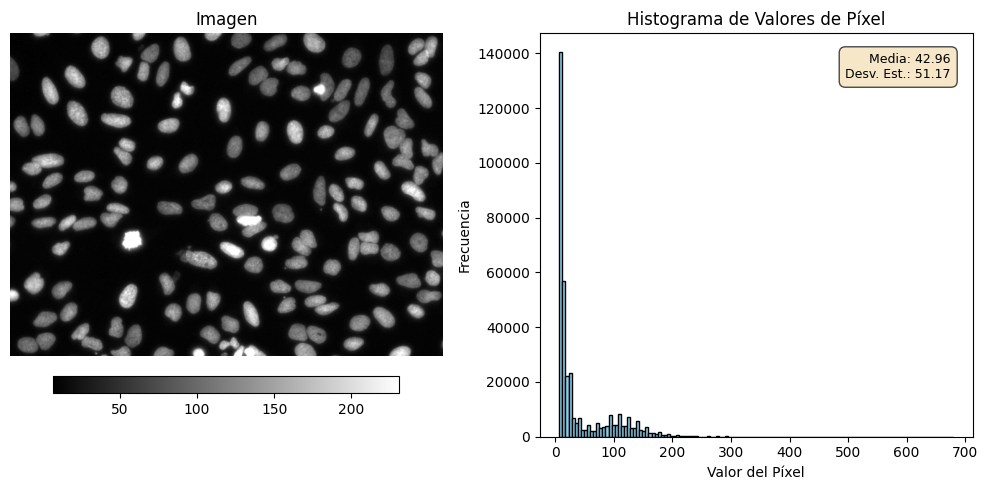

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

IMAGE_FILE = 'imagen.tif' # Por ejemplo: 'mi_foto.png', 'data/imagen.tif'
COLORMAP = 'gray'             # 'gray' para escala de grises, 'viridis' para un mapa de color, etc.
NUM_HIST_BINS = 128          

if not os.path.exists(IMAGE_FILE):
    print(f"Error: El archivo '{IMAGE_FILE}' no existe.")
    exit()
try:
    img = mpimg.imread(IMAGE_FILE)
except Exception as e:
    print(f"Error al cargar la imagen: {e}")
    print("Asegúrate de que el formato de imagen sea compatible (ej. PNG, JPG, TIFF).")
    exit()

# Convertir a escala de grises si es una imagen a color (RGB/RGBA)
if img.ndim == 3 and img.shape[2] in [3, 4]:
    img = np.mean(img[:, :, :3], axis=2).astype(img.dtype) # Promedio simple de canales

print(f"Imagen cargada: {IMAGE_FILE}")
print(f"Tipo de dato: {img.dtype}, Dimensiones: {img.shape}")
print(f"Valores de píxel (min/max): {img.min()}/{img.max()}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Usamos percentiles para un rango de visualización automático y robusto
# Esto es útil para imágenes de 16, 32 bits o flotantes, donde el rango por defecto podría ser muy amplio.
v_min_display = np.percentile(img, 0.5)
v_max_display = np.percentile(img, 99.5)
if v_min_display == v_max_display: 
    v_min_display = img.min() if img.min() < img.max() else img.min() - 1
    v_max_display = img.max() if img.min() < img.max() else img.max() + 1

im_plot = axes[0].imshow(img, cmap=COLORMAP, vmin=v_min_display, vmax=v_max_display)
axes[0].set_title('Imagen')
axes[0].axis('off') 
plt.colorbar(im_plot, ax=axes[0], shrink=0.8, orientation='horizontal', pad=0.05) 


flat_img = img.flatten() 
axes[1].hist(flat_img, bins=NUM_HIST_BINS, color='skyblue', edgecolor='black')
axes[1].set_title('Histograma de Valores de Píxel')
axes[1].set_xlabel('Valor del Píxel')
axes[1].set_ylabel('Frecuencia')


mean_val = np.mean(flat_img)
std_val = np.std(flat_img) 
text_str = f'Media: {mean_val:.2f}\nDesv. Est.: {std_val:.2f}'
axes[1].text(0.95, 0.95, text_str, transform=axes[1].transAxes,
             fontsize=9, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))


plt.tight_layout() 
plt.show() 